In [1]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

C:\Users\Kinjal\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\Kinjal\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\Kinjal\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use

In [2]:
aal = pd.read_csv("DIS.csv")
# dis = pd.read_csv("DIS.csv")
# pep = pd.read_csv("PEP.csv")

In [3]:
aal.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_returns,std_10,...,CMO_252,TR_10,ATR_10,NATR_10,TR_45,ATR_45,NATR_45,TR_252,ATR_252,NATR_252
0,2010-01-04,28.308467,28.526224,27.759719,27.933924,13700400,0.0,0,-0.558128,0.839117,...,NaN,0.766505,0.448580,1.605862,0.766505,0.561160,2.008884,0.766505,0.670993,2.402072
1,2010-01-05,27.933919,28.012312,27.611639,27.864237,10307700,0.0,0,-0.249470,0.844256,...,7.948158,0.400673,0.437257,1.569241,0.400673,0.551311,1.978562,0.400673,0.670157,2.405078
2,2010-01-06,27.785848,27.872951,27.594222,27.716166,10709500,0.0,0,-0.531403,0.699061,...,8.290704,0.278729,0.418094,1.508485,0.278729,0.537795,1.940368,0.278729,0.666718,2.405521
3,2010-01-07,27.672617,27.751010,27.472281,27.724878,8202100,0.0,0,0.031436,0.701006,...,7.416018,0.278729,0.421578,1.520578,0.278729,0.527724,1.903432,0.278729,0.663074,2.391623
4,2010-01-08,27.576793,27.820682,27.463560,27.768419,7657500,0.0,0,0.157047,0.686508,...,8.579874,0.357122,0.419836,1.511920,0.357122,0.523605,1.885613,0.357122,0.662066,2.384239


In [4]:
aal['Hl_pct'] = 100*(aal['High'].shift(1)-aal['Low'].shift(1))/aal['Close'].shift(1)
#aal['pct_change'] = 100*(aal['Close']- aal['Open'])/aal['Open']
aal1=aal.drop(['Open', 'High', 'Low'], axis=1)
aal1

,Date,Close,Volume,Dividends,Stock Splits,daily_returns,std_10,std_45,std_252,market_daily_returns,...,TR_10,ATR_10,NATR_10,TR_45,ATR_45,NATR_45,TR_252,ATR_252,NATR_252,Hl_pct
0,2010-01-04,27.933924,13700400,0.0,0,-0.558128,0.839117,1.476705,2.508964,1.604342,...,0.766505,0.448580,1.605862,0.766505,0.561160,2.008884,0.766505,0.670993,2.402072,NaN
1,2010-01-05,27.864237,10307700,0.0,0,-0.249470,0.844256,1.411429,2.506194,0.311568,...,0.400673,0.437257,1.569241,0.400673,0.551311,1.978562,0.400673,0.670157,2.405078,2.743995
2,2010-01-06,27.716166,10709500,0.0,0,-0.531403,0.699061,1.339327,2.497910,0.054552,...,0.278729,0.418094,1.508485,0.278729,0.537795,1.940368,0.278729,0.666718,2.405521,1.437947
3,2010-01-07,27.724878,8202100,0.0,0,0.031436,0.701006,1.339871,2.479482,0.400120,...,0.278729,0.421578,1.520578,0.278729,0.527724,1.903432,0.278729,0.663074,2.391623,1.005656
4,2010-01-08,27.768419,7657500,0.0,0,0.157047,0.686508,1.338823,2.477971,0.288173,...,0.357122,0.419836,1.511920,0.357122,0.523605,1.885613,0.357122,0.662066,2.384239,1.005340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,2021-07-02,177.110001,11099300,0.0,0,-0.084618,0.976356,1.010751,2.010187,0.750008,...,3.740005,2.858998,1.614250,3.740005,2.992666,1.689722,3.740005,3.924921,2.216092,1.692429
2895,2021-07-06,173.690002,11557900,0.0,0,-1.931002,1.166406,1.044274,2.011402,-0.202186,...,4.889999,3.052998,1.757728,4.889999,3.039555,1.749988,4.889999,3.935000,2.265531,2.111685
2896,2021-07-07,172.820007,6757300,0.0,0,-0.500890,1.174380,1.045448,2.011093,0.335898,...,2.330002,3.050999,1.765420,2.330002,3.003110,1.737710,2.330002,3.934445,2.276614,2.752029
2897,2021-07-08,172.800003,6960100,0.0,0,-0.011575,1.111354,1.042529,2.005000,-0.856102,...,3.940002,3.194000,1.848380,3.940002,3.016888,1.745884,3.940002,3.932937,2.276005,1.348225


In [5]:
aal1 = aal.set_index("Date")
aal1.index = pd.to_datetime(aal1.index)

In [6]:
print(len(aal1.columns))
aal1.dropna(inplace=True)
aal1 = aal1.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
def get_VIF(df, target):
    X = add_constant(df.loc[:, df.columns != target])
    res = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns,)
    return res
target = 'Close'
g_all=get_VIF(aal1, target).to_frame()
g_all
g=g_all[~g_all.isin([np.nan, np.inf, -np.inf]).any(1)]
g.columns = ['VIF']
g= g[g['VIF']<100]
g.reset_index
c=list(g.index.values)
#aal1=aal1[c]
#c.remove('const')
c.append('Close')
aal1 = aal1[c]
print(len(aal1.columns))
g

73


C:\Users\Kinjal\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\Kinjal\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Kinjal\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


38


,VIF
Volume,3.023428
Dividends,1.014897
daily_returns,6.079870
std_10,15.079289
std_45,45.546683
market_daily_returns,2.305406
beta,5.143071
residual_volatility,92.944378
ER_10,41.023999
ROC_10,16.322794


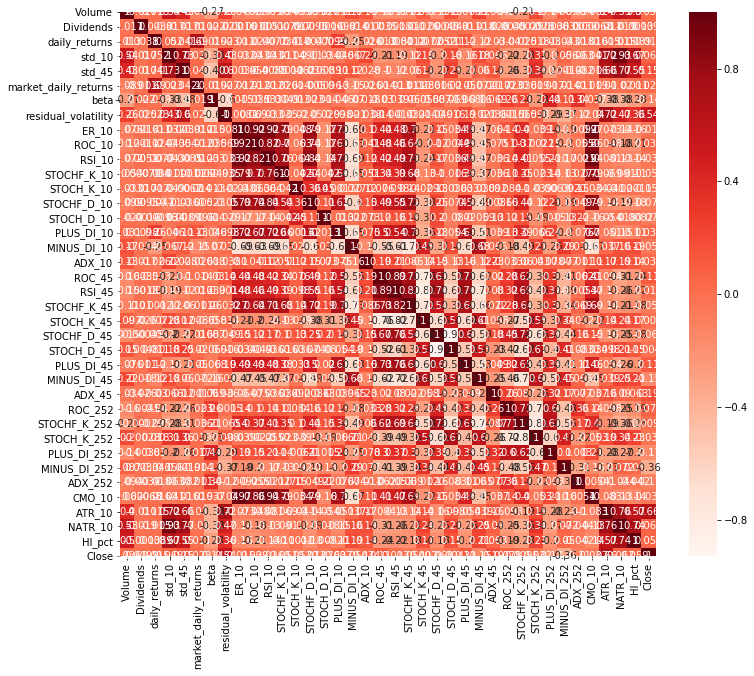

In [7]:
# https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = aal1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [8]:
aal1

,Volume,Dividends,daily_returns,std_10,std_45,market_daily_returns,beta,residual_volatility,ER_10,ROC_10,...,STOCHF_K_252,STOCH_K_252,PLUS_DI_252,MINUS_DI_252,ADX_252,CMO_10,ATR_10,NATR_10,Hl_pct,Close
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-04,21974200,0.0,3.093644,1.168483,1.318500,-0.131306,0.786229,0.946916,0.177012,0.020783,...,98.227483,-196.562153,24.680792,21.132687,7.609061,35.160092,0.457890,1.333676,1.004762,34.332928
2011-01-05,22003400,0.0,2.487775,1.326014,1.359452,0.500717,0.787826,0.955772,0.386002,0.052078,...,110.311989,-241.374333,25.103128,20.956512,7.609937,57.612280,0.515125,1.463962,2.949478,35.187054
2011-01-06,14738300,0.0,-0.775774,1.351613,1.368252,-0.212296,0.788699,0.956838,0.477313,0.070453,...,109.055917,-132.049060,24.960571,20.837503,7.618591,64.938403,0.502798,1.440102,2.077082,34.914082
2011-01-07,6598700,0.0,-0.504419,1.338395,1.372131,-0.184478,0.789019,0.957328,0.320151,0.044796,...,96.982920,-90.265076,24.830926,20.904623,7.627162,45.454777,0.510723,1.470215,1.134933,34.737968
2011-01-10,8772600,0.0,0.126758,1.294838,1.343801,-0.137633,0.789451,0.950595,0.323476,0.046419,...,95.258858,-89.222731,24.739082,20.971373,7.633077,47.425775,0.525692,1.511392,1.318125,34.782001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-02,11099300,0.0,-0.084618,0.976356,1.010751,0.750008,0.954512,1.802146,0.099847,0.014944,...,71.698518,-176.931591,24.866171,20.527821,8.596539,15.489598,2.858998,1.614250,1.692429,177.110001
2021-07-06,11557900,0.0,-1.931002,1.166406,1.044274,-0.202186,0.962080,1.805632,0.166667,0.027201,...,71.533726,-173.653955,24.704054,20.636017,8.600342,31.753529,3.052998,1.757728,2.111685,173.690002
2021-07-07,6757300,0.0,-0.500890,1.174380,1.045448,0.335898,0.968325,1.806627,-0.009343,-0.001609,...,67.558898,-170.376830,24.609496,20.580227,8.601817,-1.682683,3.050999,1.765420,2.752029,172.820007


In [9]:
#Correlation with output variable
cor_target = abs(cor["Close"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
rel_feat = pd.DataFrame(relevant_features.index)
rel_feat.columns = ["sel_col"]

In [10]:
aal_df = aal1[rel_feat["sel_col"]]
# aal_df['Date']=aal1['Date']

In [11]:
print(len(aal1.columns), len(rel_feat))

38 4


In [12]:
#aal_df = aal1.copy()

In [13]:
#aal_df=aal_df.drop(['Typical Price'], axis=1)

In [14]:
aal_close_px = aal_df['Close']

In [15]:
# https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7
mavg = aal_close_px.rolling(window=100).mean()


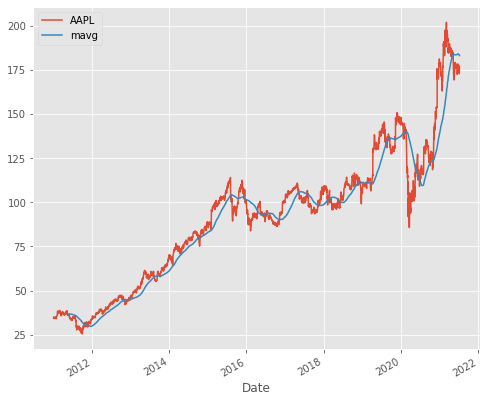

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

aal_close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

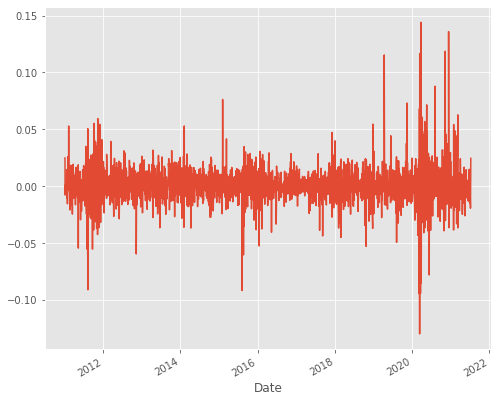

In [17]:
rets = aal_close_px/aal_close_px.shift(1) - 1
rets.plot(label='return')

In [18]:
aal_df['prev_day'] = aal_df['Close'].shift(1)

C:\Users\Kinjal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
aal_df = aal_df.iloc[1:]

In [20]:
# aal_df = aal_df.set_index("Date")

In [21]:
# aal_df = aal_df.set_index("Date")
# aal_df.index = pd.to_datetime(aal_df.index)
# aal_df.index[0]

In [22]:
# print(len(aal_df.columns))
# aal_df.fillna(value=-99999, inplace=True)
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant
# def get_VIF(df, target):
#     X = add_constant(df.loc[:, df.columns != target])
#     res = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns,)
#     return res
# target = 'Close'
# g_all=get_VIF(aal_df, target).to_frame()
# g_all
# g=g_all[~g_all.isin([np.nan, np.inf, -np.inf]).any(1)]
# g.reset_index
# c=list(g.index.values)
# #aal_df=aal_df[c]
# c.remove('const')
# c.append('Close')
# aal_df = aal_df[c]
# print(len(aal_df.columns))
# g

In [23]:
# g_all

In [24]:
# aal = aal[['Volume', 'std_45', 'PLUS_DI_252', 'std_252', 'prev_day',
#        'residual_volatility', 'MINUS_DI_252',"Close"]]
# aal_df = aal.copy()

In [25]:
# training test split
key = pd.Timestamp(2016, 12, 29)
key2 = pd.Timestamp(2019, 12, 31)

train = aal_df[aal_df.index<=key].copy()
test = aal_df[(aal_df.index<=key2) & (aal_df.index>key)].copy()
col = set(train.columns)
col.remove("Close")
xtrain = train[col]
ytrain = train["Close"]
xtest = test[col]
ytest = test["Close"]

In [26]:
aal_df = aal_df.iloc[1:,:]
#aal_df.drop(['Open', 'High',"Low"], axis=1, inplace = True)
aal_df

,residual_volatility,MINUS_DI_252,ATR_10,Close,prev_day
Date,,,,,
2011-01-06,0.956838,20.837503,0.502798,34.914082,35.187054
2011-01-07,0.957328,20.904623,0.510723,34.737968,34.914082
2011-01-10,0.950595,20.971373,0.525692,34.782001,34.737968
2011-01-11,0.947872,20.887194,0.536259,34.693939,34.782001
2011-01-12,0.948221,20.909501,0.543303,34.491413,34.693939
...,...,...,...,...,...
2021-07-02,1.802146,20.527821,2.858998,177.110001,177.259995
2021-07-06,1.805632,20.636017,3.052998,173.690002,177.110001
2021-07-07,1.806627,20.580227,3.050999,172.820007,173.690002


In [27]:
 #!pip install -U statsmodels
#!pip install -U pandas


In [28]:
# # predicting stock prices, feature engineering

# aal_dfreg = aal[['Close', 'Volume']]
# aal_dfreg['HL_PCT'] = (aal['High'] - aal['Low'])/aal['Close'] * 100.0
# aal_dfreg['PCT_change'] = (aal['Close'] - aal['Open'])/aal['Open'] * 100.0
# aal_dfreg

In [29]:
# import math
# from sklearn import preprocessing
# # Drop missing value
# aal_df.fillna(value=-99999, inplace=True)
# # We want to separate 1 percent of the data to forecast
# forecast_out = int(math.ceil(0.1 * len(aal_df)))
# # Separating the label here, we want to predict the AdjClose
# forecast_col = 'Close'
# aal_dfreg['label'] = aal_dfreg[forecast_col].shift(-forecast_out)
# X = np.array(aal_dfreg.drop(['label'], 1))
# # Scale the X so that everyone can have the same distribution for linear regression
# X = preprocessing.scale(X)
# # Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
# X_lately = X[-forecast_out:]
# X = X[:-forecast_out]
# # Separate label and identify it as y
# y = np.array(aal_dfreg['label'])
# y = y[:-forecast_out]

In [30]:
# # # model generation
xtrain.dropna(inplace=True)
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

C:\Users\Kinjal\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [31]:
cols = xtrain.columns
cols

Index(['ATR_10', 'residual_volatility', 'prev_day', 'MINUS_DI_252'], dtype='object')

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#xtrain = scaler.fit_transform(xtrain)
#xtest = scaler.transform(xtest)

In [33]:
xtrain

,ATR_10,residual_volatility,prev_day,MINUS_DI_252
Date,,,,
2011-01-05,0.515125,0.955772,34.332928,20.956512
2011-01-06,0.502798,0.956838,35.187054,20.837503
2011-01-07,0.510723,0.957328,34.914082,20.904623
2011-01-10,0.525692,0.950595,34.737968,20.971373
2011-01-11,0.536259,0.947872,34.782001,20.887194
...,...,...,...,...
2016-12-22,1.295658,0.763199,101.086388,24.269042
2016-12-23,1.135735,0.763104,100.952324,24.229650
2016-12-27,1.102219,0.757739,100.693771,24.231680


In [34]:
#xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=42)
# Linear regression
from sklearn import linear_model
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(xtrain, ytrain)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(xtrain, ytrain)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(xtrain, ytrain)
clflass = linear_model.Lasso(alpha=0.1)
clflass.fit(xtrain, ytrain)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(xtrain, ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [36]:
confidencereg = clfreg.score(xtest, ytest)
confidencepoly2 = clfpoly2.score(xtest,ytest)
confidencepoly3 = clfpoly3.score(xtest,ytest)
confidenceknn = clfknn.score(xtest, ytest)
print('The linear regression confidence is ', confidencereg)
print('The quadratic regression 2 confidence is ', confidencepoly2)
print('The quadratic regression 3 confidence is ', confidencepoly3)
print('The knn regression confidence is ', confidenceknn)
clflass.score(xtest, ytest)

The linear regression confidence is  0.9905910074782718
The quadratic regression 2 confidence is  0.9893564309807866
The quadratic regression 3 confidence is  0.9538453865371762
The knn regression confidence is  0.07522074464230721


0.9906096575483478

In [37]:
forecast_set = clfreg.predict(xtest)
Forecast = pd.DataFrame()
Forecast['Forecast'] = np.nan
Forecast['Date']=aal_df.index
Forecast=Forecast.set_index('Date')

In [38]:
forecast_set
Forecast['Forecast']

Date
2011-01-06   NaN
2011-01-07   NaN
2011-01-10   NaN
2011-01-11   NaN
2011-01-12   NaN
              ..
2021-07-02   NaN
2021-07-06   NaN
2021-07-07   NaN
2021-07-08   NaN
2021-07-09   NaN
Name: Forecast, Length: 2644, dtype: float64

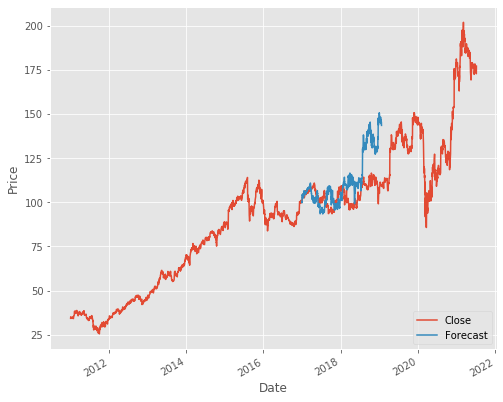

KeyError: 'Forecast'

In [39]:
# Plotting the prediction
from datetime import datetime, timedelta
last_date = key
last_unix = last_date
try:
    next_unix = last_unix + timedelta(days=1)
except:
    next_unix = timedelta(last_unix) + timedelta(days = 1)

for i in forecast_set:
    next_date = next_unix
    next_unix += timedelta(days=1)
    Forecast.loc[next_date] = [i]
aal1['Close'].plot()
Forecast['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
aal_df['Forecast']

In [ ]:
print(next_unix)

In [ ]:
print(clfreg.coef_)

In [ ]:
print(clfreg.intercept_)

In [ ]:
xtrain.columns

In [40]:
coeff = dict(zip(cols, clfreg.coef_))


In [41]:

coeff

{'ATR_10': 0.04015157567813245,
 'residual_volatility': -0.38250144133759045,
 'prev_day': 0.9974426787410934,
 'MINUS_DI_252': -0.024074954071402838}

In [42]:
dict(sorted(coeff.items(), key=lambda item: abs(item[1]), reverse = True))

{'prev_day': 0.9974426787410934,
 'residual_volatility': -0.38250144133759045,
 'ATR_10': 0.04015157567813245,
 'MINUS_DI_252': -0.024074954071402838}

In [43]:
aal_df

,residual_volatility,MINUS_DI_252,ATR_10,Close,prev_day
Date,,,,,
2011-01-06,0.956838,20.837503,0.502798,34.914082,35.187054
2011-01-07,0.957328,20.904623,0.510723,34.737968,34.914082
2011-01-10,0.950595,20.971373,0.525692,34.782001,34.737968
2011-01-11,0.947872,20.887194,0.536259,34.693939,34.782001
2011-01-12,0.948221,20.909501,0.543303,34.491413,34.693939
...,...,...,...,...,...
2021-07-02,1.802146,20.527821,2.858998,177.110001,177.259995
2021-07-06,1.805632,20.636017,3.052998,173.690002,177.110001
2021-07-07,1.806627,20.580227,3.050999,172.820007,173.690002


In [ ]:
xtrain.shape, ytrain.shape

In [ ]:
clfreg = LinearRegression()
clfreg.fit(xtrain, ytrain)

In [ ]:
clfreg.score(xtrain, ytrain)

In [ ]:
clfreg.score(xtest, ytest)

In [ ]:
ytrain